In [164]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# The model slug is the most recently created folder in ./models/logs

MODEL_SLUG = sorted(os.listdir("./models/logs"))[-1]
print(f"Using model {MODEL_SLUG}")

actions = pd.read_csv(f"./models/logs/{MODEL_SLUG}/actions.csv")

plt.rcParams['figure.figsize'] = [15, 5]

plt.close()

Using model ADDQN-400m-testCourse-09-12-2023_13:53


In [165]:
# episode,step,total_reward,power_max_w,velocity,gradient,percent_complete,AWC,

# Get all the episodes where the last step in the episode is less than 62
terminal = actions.groupby("episode").last()

winning_episodes = terminal[
    (terminal["step"] < 62) &
    ( terminal['percent_complete'] == 1.0)
    ]

print(f"Found {len(winning_episodes)} winning episodes")

# Get these episodes from the actions dataframe
winning_runs = actions[actions["episode"].isin(winning_episodes.index)]

Found 4 winning episodes


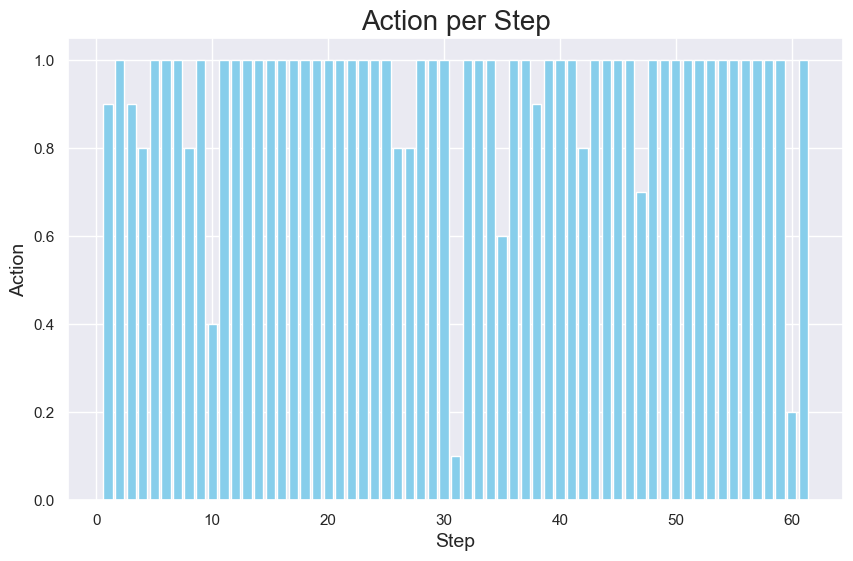

In [166]:
# get the first winning run
winning_run = winning_runs[winning_runs["episode"] == winning_episodes.index[0]]


# Set the style to a seaborn theme
sns.set_theme()

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(winning_run["step"], winning_run["action"], color='skyblue')

# Add labels and title
plt.xlabel('Step', fontsize=14)
plt.ylabel('Action', fontsize=14)
plt.title('Action per Step', fontsize=20)

# Show the plot
plt.show()